# Pandas Time Series III

## Rolling average air quality since 2010 for new york city

To practice with rolling window functions, we'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


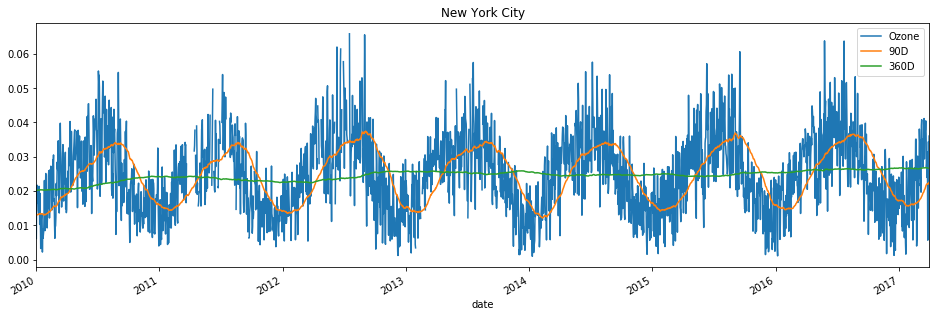

In [6]:
# Import and inspect ozone data here
data = pd.read_csv('data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data['2010':].plot(title = 'New York City', figsize=(16, 5))
plt.show()

## Rolling 360-day median & std. deviation for nyc ozone data since 2000

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

We'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

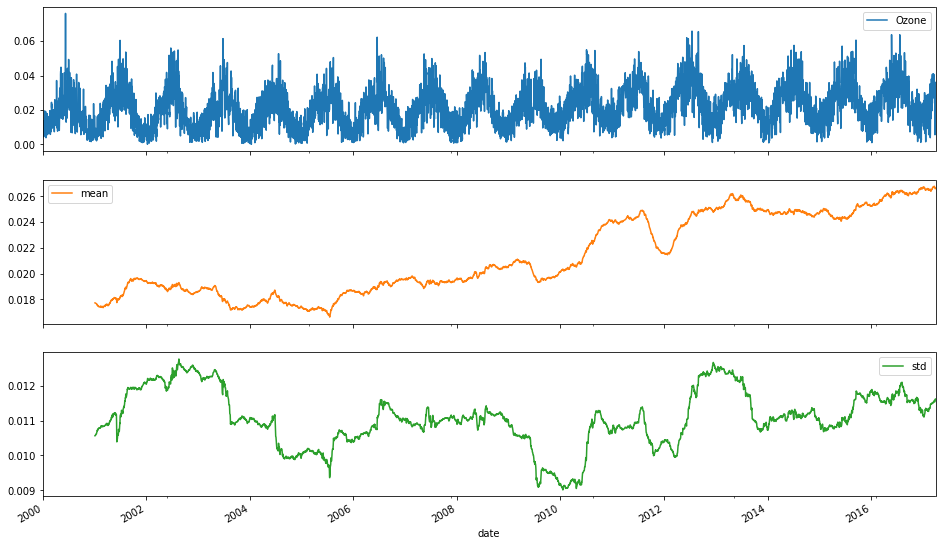

In [12]:
# Import and inspect ozone data here
data = pd.read_csv('data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True, figsize=(16, 10))
plt.show()

## Rolling quantiles for daily air quality in nyc

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 4 columns):
Ozone    6300 non-null float64
q10      5941 non-null float64
q50      5941 non-null float64
q90      5941 non-null float64
dtypes: float64(4)
memory usage: 246.1 KB
None


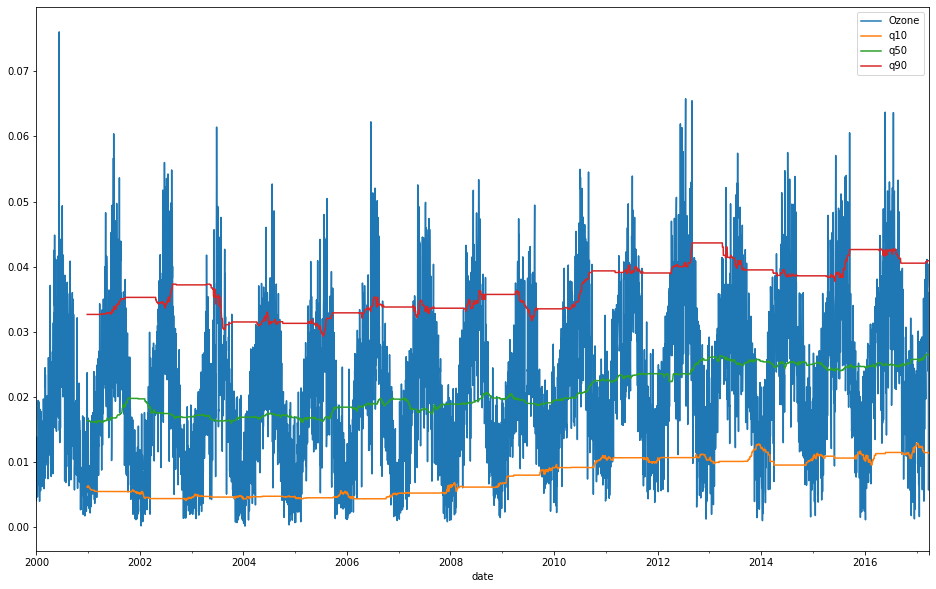

In [14]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot(figsize=(16, 10))
plt.show()